# 1. Importing Libraries

In [125]:
import sklearn
import numpy as np
import pandas as pd
import plotly as plot
import plotly.express as px
import plotly.graph_objs as go

import cufflinks as cf
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import accuracy_score
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

from sklearn.model_selection import train_test_split

pyo.init_notebook_mode(connected=True)
cf.go_offline()

# 2. Data collection

Data collection is the process of gathering information in an established systematic way that enables one to test hypothesis and evaluate outcomes easily.

In [126]:
dt= pd.read_csv('data.csv')

Lets see some of the sample entries of dataset

In [127]:
dt.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


# 3. Dataset description

Our Predictor (Y, Positive or Negative diagnosis of Heart Disease) is determined by 13 features (X):
The detailed description of all the features are as follows:
1. age - Patients Age in years (Numeric)
2. sex : Gender of patient (1= Male, 0= Female) (Binary)
3. (cp) - Type of chest pain experienced by patient (4 values -Ordinal):
Value 1: typical angina ,
Value 2: atypical angina,
Value 3: non-anginal pain ,
Value 4: asymptomatic
4. (trestbps) - Level of blood pressure at resting mode in mm/HG (Numerical)
5. (chol)- serum cholesterol in mg/dl (Numeric)
6. (fbs)- Blood sugar levels on fasting > 120 mg/dl represents as 1 in case of true and 0 as false (Nominal)
(1 = true; 0 = false)
7. (restecg)- Result of electrocardiogram while at rest are represented in 3 distinct values 0 : Normal 1: Abnormality in ST-T wave 2: Left ventricular hypertrophy (Nominal)
8. (thalach)- maximum heart rate achieved
9. (exang) exercise induced angina (binary) (1 = yes; 0 = no)
10. (oldpeak) = ST depression induced by exercise relative to rest
11. (slope) of the peak exercise ST segment (Ordinal) (Value 1: up sloping , Value 2: flat , Value 3: down sloping )
12. (ca) number of major vessels (0–3, Ordinal) colored by fluoroscopy
13. (thal) maximum heart rate achieved — (Ordinal): 3 = normal; 6 = fixed defect; 7 = reversible defect


## 4. Data Cleaning & Preprocessing

### Data cleaning:
It is the process of ensuring that your data is correct and useable by identifying any errors in the data, or missing data by correcting or deleting them.



### Data preprocessing:
It is a data mining technique that involves transforming raw data into an understandable format. It includes normalisation and standardisation, transformation, feature extraction and selection, etc. The product of data preprocessing is the final training dataset.

##### In this step we will first change the name of columns as some of the columns have weird naming pattern

In [128]:
# renaming features to proper name
dt.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'count_of_major_vessels' , 'max_heart_rate' , 'target']

In [129]:
dt.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,count_of_major_vessels,max_heart_rate,target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


##### lets check how many persons are suffering from heart disease: 
    

In [130]:
dt.groupby('target').size()

target
1    150
2    120
dtype: int64

###### Let’s have a look to the statistical summary about our dataset.

In [131]:
dt.describe() #tells some mathematical functions

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,count_of_major_vessels,max_heart_rate,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


Lets check counts of categorical features:
    

In [132]:
dt['sex'].value_counts()

1    183
0     87
Name: sex, dtype: int64

In [150]:
dt['st_slope'].value_counts()

1    130
2    122
3     18
Name: st_slope, dtype: int64

In [151]:
dt['rest_ecg'].value_counts()

2    137
0    131
1      2
Name: rest_ecg, dtype: int64

In [152]:
dt['chest_pain_type'].value_counts()

4    129
3     79
2     42
1     20
Name: chest_pain_type, dtype: int64

##### checking if any value is null or any entry is missing

In [153]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      270 non-null    int64  
 1   sex                      270 non-null    int64  
 2   chest_pain_type          270 non-null    int64  
 3   resting_blood_pressure   270 non-null    int64  
 4   cholesterol              270 non-null    int64  
 5   fasting_blood_sugar      270 non-null    int64  
 6   rest_ecg                 270 non-null    int64  
 7   max_heart_rate_achieved  270 non-null    int64  
 8   exercise_induced_angina  270 non-null    int64  
 9   st_depression            270 non-null    float64
 10  st_slope                 270 non-null    int64  
 11  count_of_major_vessels   270 non-null    int64  
 12  max_heart_rate           270 non-null    int64  
 13  target                   270 non-null    int64  
dtypes: float64(1), int64(13)
m

# 5. Exploratory Data Analysis (EDA)

In [154]:
# first checking the shape of the dataset
dt.shape

(270, 14)

#### So, there are total 1189 records and 11 features with 1 target variable. Lets check the summary of numerical and categorical features.

In [155]:
dt.describe(include =[np.number])

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,count_of_major_vessels,max_heart_rate,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


We will now look at the distribution of each attribute by discretization the values into buckets and review the frequency in each bucket as histograms.
This lets you note interesting properties of the attribute distributions such as the possible normal distribution of attributes

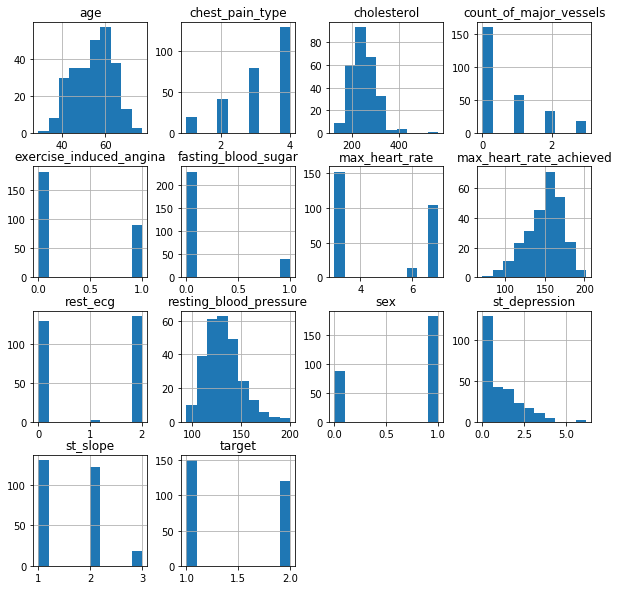

In [156]:
dt.hist(figsize=(10,10))
plt.show()

## Distribution of Heart disease (target variable)

#### First we will check if our data is balanced or not!

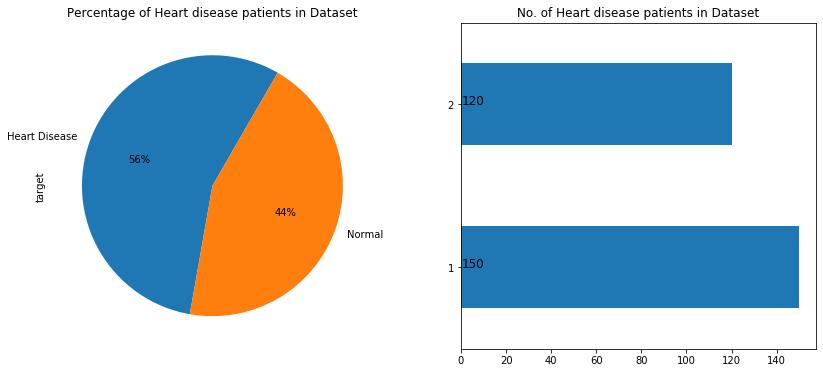

In [157]:
## Plotting attrition of employees
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))

ax1 = dt['target'].value_counts().plot.pie( x="Heart disease" ,y ='no.of patients', 
                   autopct = "%1.0f%%",labels=["Heart Disease","Normal"], startangle = 60,ax=ax1);
ax1.set(title = 'Percentage of Heart disease patients in Dataset')

ax2 = dt["target"].value_counts().plot(kind="barh" ,ax =ax2)
for i,j in enumerate(dt["target"].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
    
ax2.set(title = 'No. of Heart disease patients in Dataset')
plt.show()

##### The dataset is balanced having 629 heart disease patients and 561 normal patients.

#### Now we will create separate dataframe for normal and heart patients

In [158]:
attr_1=dt[dt['target']==1] 

attr_0=dt[dt['target']==0] #normal patients

##### Age distribution of normal patients VS Age distribution of heart disease patients.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:200: RuntimeWarning:

Mean of empty slice.

C:\Users\HP\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\HP\anaconda3\lib\site-packages\numpy\lib\histograms.py:908: RuntimeWarning:

invalid value encountered in true_divide



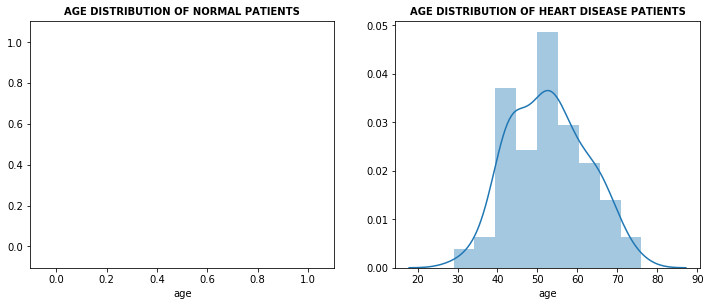

In [159]:
plt.figure(figsize=(12,10))

plt.subplot(221)
sns.distplot(attr_0['age'])
plt.title('AGE DISTRIBUTION OF NORMAL PATIENTS', fontsize=10, weight='bold')

plt.subplot(222)
sns.distplot(attr_1['age'])
plt.title('AGE DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=10, weight='bold')


plt.show()

### Distribution of Numerical features

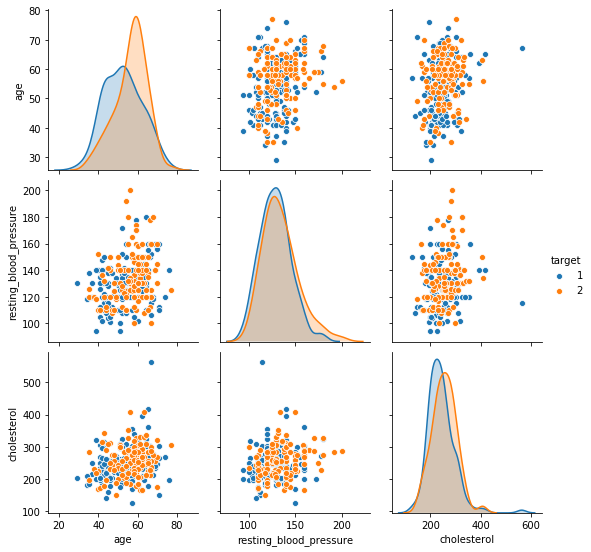

In [160]:
sns.pairplot(dt, hue = 'target', vars = ['age', 'resting_blood_pressure', 'cholesterol'] )

From the above plot it is clear that as the age increases chances of heart disease increases



## Correlation Matrix

(14.5, -0.5)

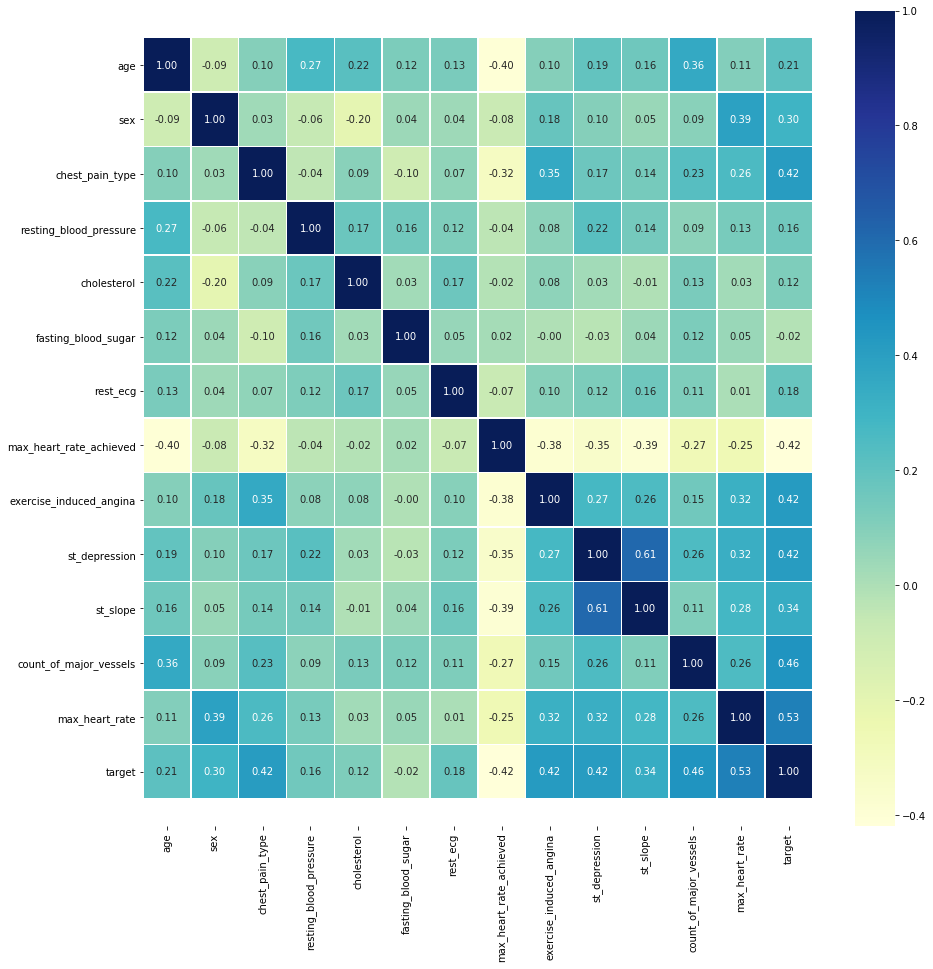

In [161]:
corr_matrix = dt.corr()

fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

#### Correlation with target variable

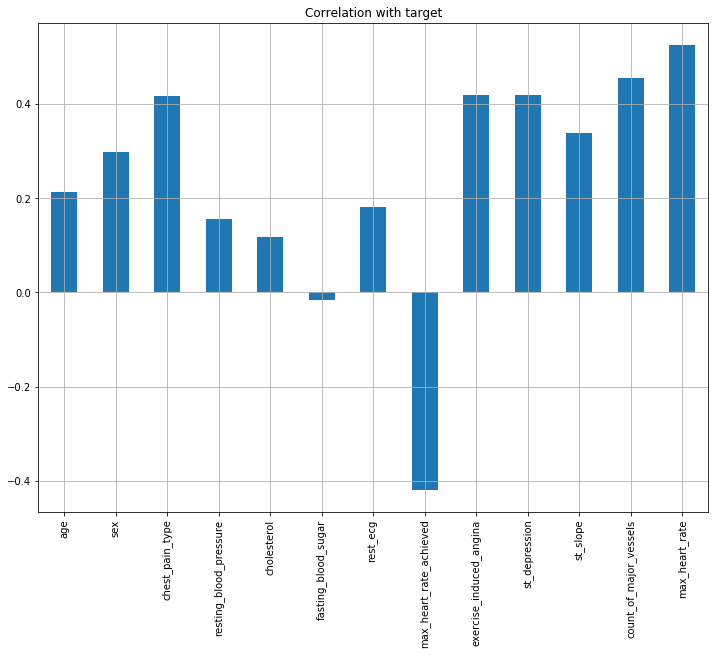

In [162]:
dt.drop('target', axis=1).corrwith(dt.target).plot(kind='bar', grid=True, figsize=(12, 9), 
                                                   title="Correlation with target")

##### Conclusion from above graph:

#### Now before splitting dataset into train and test we first encode categorical variables as dummy variables as Most Machine Learning Algorithms cannot work with categorical variables directly, they need to be converted to numbers..



In [163]:
dt = pd.get_dummies(dt, drop_first=True)

dt.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,count_of_major_vessels,max_heart_rate,target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


# 6. Build and Train the Model

## 6.1. Train Test Split

In [164]:
# segregating dataset into features i.e., X and target variables i.e., y
X = dt.drop(['target'],axis=1)
y = dt['target']

#### Now let’s split the data into training and test sets.
 I will split the data into 80% training and 20% testing:

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

In [166]:
## checking distribution of traget variable in train test split
print('Distribution of traget variable in training set')
print(y_train.value_counts())

print('Distribution of traget variable in test set')
print(y_test.value_counts())

Distribution of traget variable in training set
1    120
2     96
Name: target, dtype: int64
Distribution of traget variable in test set
1    30
2    24
Name: target, dtype: int64


In [167]:
print('------------Training Set------------------')
print(X_train.shape)
print(y_train.shape)

print('------------Test Set------------------')
print(X_test.shape)
print(y_test.shape)

------------Training Set------------------
(216, 13)
(216,)
------------Test Set------------------
(54, 13)
(54,)


## 6.2.Feature Scaling

In [168]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(X_train)    
x_test= st_x.transform(X_test)    

## 6.3. Fitting the Random Forest algorithm to the training set:

Now we’ll Train various Classification Models on the Training set & see which yields the highest accuracy. We will compare the accuracy of Logistic Regression, K-NN (k-Nearest Neighbours), SVM (Support Vector Machine), Naives Bayes Classifier, Decision Trees,and Random Forest

1.Random Forest Algorithm


In [169]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 100, criterion="entropy")  
classifier.fit(x_train, y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [170]:
#n_estimators= The required number of trees in the Random Forest
#criterion= It is a function to analyze the accuracy of the split. Here we have taken "entropy" for the information gain.

# Model 1: Logistic Regression

In [171]:
#Model 1: Logistic Regression
from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(random_state=1) # get instance of model
model1.fit(x_train, y_train) # Train/Fit model 

y_pred1 = model1.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred1)) # output accuracy
print(f"The Accuracy Score of Logistic Regression Algorithm is: {accuracy_score(y_test, y_pred1) * 100:.2f}%")

              precision    recall  f1-score   support

           1       0.89      0.83      0.86        30
           2       0.81      0.88      0.84        24

    accuracy                           0.85        54
   macro avg       0.85      0.85      0.85        54
weighted avg       0.86      0.85      0.85        54

The Accuracy Score of Logistic Regression Algorithm is: 85.19%


# Model 2: K-NN (K-Nearest Neighbors)

In [114]:
#Model 2: K-NN (K-Nearest Neighbors)
from sklearn.metrics import classification_report 
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier() # get instance of model
model2.fit(x_train, y_train) # Train/Fit model 

y_pred2 = model2.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred2)) # output accuracy
print(f"The Accuracy Score of K-NN (K-Nearest Neighbors) is: {accuracy_score(y_test, y_pred2) * 100:.2f}%")

              precision    recall  f1-score   support

           1       0.81      0.83      0.82        30
           2       0.78      0.75      0.77        24

    accuracy                           0.80        54
   macro avg       0.79      0.79      0.79        54
weighted avg       0.80      0.80      0.80        54

The Accuracy Score of K-NN (K-Nearest Neighbors) is: 79.63%


# Model 3: SVM (Support Vector Machine)

In [115]:
#Model 3: SVM (Support Vector Machine)
from sklearn.metrics import classification_report 
from sklearn.svm import SVC

model3 = SVC(random_state=1) # get instance of model
model3.fit(x_train, y_train) # Train/Fit model 

y_pred3 = model3.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred3)) # output accuracy
print(f"The Accuracy Score of SVM (Support Vector Machine) is: {accuracy_score(y_test, y_pred3) * 100:.2f}%")

              precision    recall  f1-score   support

           1       0.89      0.80      0.84        30
           2       0.78      0.88      0.82        24

    accuracy                           0.83        54
   macro avg       0.83      0.84      0.83        54
weighted avg       0.84      0.83      0.83        54

The Accuracy Score of SVM (Support Vector Machine) is: 83.33%


# Model 4: Naives Bayes Classifier

In [116]:
#Model 4: Naives Bayes Classifier
from sklearn.metrics import classification_report 
from sklearn.naive_bayes import GaussianNB

model4 = GaussianNB() # get instance of model
model4.fit(x_train, y_train) # Train/Fit model 

y_pred4 = model4.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred4)) # output accuracy
print(f"The Accuracy Score of Naives Bayes Classifier is: {accuracy_score(y_test, y_pred3) * 100:.2f}%")

              precision    recall  f1-score   support

           1       0.80      0.80      0.80        30
           2       0.75      0.75      0.75        24

    accuracy                           0.78        54
   macro avg       0.78      0.78      0.78        54
weighted avg       0.78      0.78      0.78        54

The Accuracy Score of Naives Bayes Classifier is: 83.33%


# Model 5 : RandomForestClassifier

In [117]:
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier

model5 = RandomForestClassifier(random_state=1)# get instance of model
model5.fit(x_train, y_train) # Train/Fit model 

y_pred5 = model4.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred5)) # output accuracy
print(f"The Accuracy Score of RandomForestClassifier is: {accuracy_score(y_test, y_pred5) * 100:.2f}%")

              precision    recall  f1-score   support

           1       0.80      0.80      0.80        30
           2       0.75      0.75      0.75        24

    accuracy                           0.78        54
   macro avg       0.78      0.78      0.78        54
weighted avg       0.78      0.78      0.78        54

The Accuracy Score of RandomForestClassifier is: 77.78%


# Model 6: Decision Trees

In [118]:
#Model 6: Decision Trees
from sklearn.metrics import classification_report 
from sklearn.tree import DecisionTreeClassifier

model6 = DecisionTreeClassifier(random_state=1) # get instance of model
model6.fit(x_train, y_train) # Train/Fit model 

y_pred6 = model5.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred6)) # output accuracy
print(f"The Accuracy Score of Decision Trees is: {accuracy_score(y_test, y_pred6) * 100:.2f}%")

              precision    recall  f1-score   support

           1       0.86      0.80      0.83        30
           2       0.77      0.83      0.80        24

    accuracy                           0.81        54
   macro avg       0.81      0.82      0.81        54
weighted avg       0.82      0.81      0.82        54

The Accuracy Score of Decision Trees is: 81.48%


## 6.4.  Predicting the Test Set result:
Since random forest model is fitted to the training set, so now we can predict the test result. For prediction, we will create a new prediction vector y_pred.

In [119]:
#Predicting the test set result  
y_pred= model5.predict(x_test) 
y_pred2= model5.predict(x_test) #copied
y_pred2= pd.DataFrame(data = y_pred, columns= ['Predicted'])
y_pred2.style.set_table_styles([{'selector' : '', 
                            'props' : [('border', 
                                        '2px solid ')]}]) 


,Predicted
0,1
1,1
2,1
3,2
4,1
5,1
6,2
7,1
8,2
9,2


In [120]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.style.set_table_styles([{'selector' : '', 
                            'props' : [('border', 
                                        '2px solid ')]}]) 

,Actual,Predicted
260,1,1
194,1,1
112,2,1
14,1,2
206,1,1
15,1,1
172,2,2
157,1,1
120,2,2
231,2,2


## 6.5. Creating the Confusion Matrix

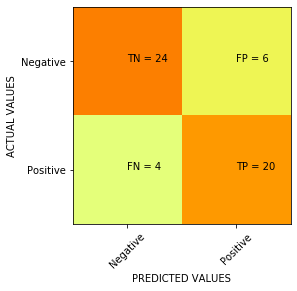

In [121]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix 

cm= confusion_matrix(y_test, y_pred) 

plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']

plt.ylabel('ACTUAL VALUES')
plt.xlabel('PREDICTED VALUES')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

# 7. Classification Report:

In [122]:
#Accuracy: equal to the fraction of predictions that a model got right.
acc1= accuracy_score(y_test, y_pred1) #logistic
acc2= accuracy_score(y_test, y_pred2) #knn
acc3= accuracy_score(y_test, y_pred3) #svm
acc4= accuracy_score(y_test, y_pred4) #naive
acc= accuracy_score(y_test, y_pred) #Random Forest
acc6= accuracy_score(y_test, y_pred6) #decision
#Recall: attempts to answer “What proportion of actual positives was identified correctly?”   = tp/(tp+fn)
prec1= sklearn.metrics.precision_score(y_test, y_pred1) #logistic
prec2= sklearn.metrics.precision_score(y_test, y_pred2) #knn
prec3= sklearn.metrics.precision_score(y_test, y_pred3) #svm
prec4= sklearn.metrics.precision_score(y_test, y_pred4) #naive
prec= sklearn.metrics.precision_score(y_test, y_pred) #Random Forest
prec6= sklearn.metrics.precision_score(y_test, y_pred6) #decision
#Precision: attempts to answer “What proportion of positive identifications was actually correct?”   =tp/(tp+fp)
rec1 =sklearn.metrics.recall_score(y_test, y_pred1) #logistic
rec2 =sklearn.metrics.recall_score(y_test, y_pred2) #knn
rec3 =sklearn.metrics.recall_score(y_test, y_pred3) #svm
rec4 =sklearn.metrics.recall_score(y_test, y_pred4) #naive
rec =sklearn.metrics.recall_score(y_test, y_pred) #Random Forest
rec6 =sklearn.metrics.recall_score(y_test, y_pred6) #decision

In [123]:
model_results =pd.DataFrame([['Logistic regression ',acc1, prec1,rec1,],['K-N-N ',acc2, prec2,rec2,],['SVM ',acc3, prec3,rec3,],['Naives Bayes  ',acc4, prec4,rec4,],['Random Forest ',acc, prec,rec,],['Decision Tree ',acc6, prec6,rec6,]],
               columns = ['Model', 'Accuracy','Precision', 'Recall'])
model_results.style.set_table_styles([{'selector' : '', 
                            'props' : [('border', 
                                        '2px solid ')]}]) 

,Model,Accuracy,Precision,Recall
0,Logistic regression,0.851852,0.892857,0.833333
1,K-N-N,0.814815,0.857143,0.800000
2,SVM,0.833333,0.888889,0.800000
3,Naives Bayes,0.777778,0.800000,0.800000
4,Random Forest,0.814815,0.857143,0.800000
5,Decision Tree,0.814815,0.857143,0.800000


# 8. Conclusion:
    

1. Out of the 13 features we examined, the top 4 significant features that helped us classify between a positive & negative Diagnosis were chest pain type (cp), maximum heart rate achieved (thalach), number of major vessels (ca), and ST depression induced by exercise relative to rest (oldpeak).
2. Our machine learning algorithm can now classify patients with Heart Disease. Now we can properly diagnose patients, & get them the help they needs to recover. By diagnosing detecting these features early, we may prevent worse symptoms from arising later.
3. Our Random Forest algorithm yields one of the highest accuracy, 81%. Any accuracy above 70% is considered good, but be careful because if your accuracy is extremely high, it may be too good to be true (an example of Over fitting). Thus, 81% is the ideal accuracy!